#Approach

**1) About SciBert**

SCIBERT is  a pretrained language model based on BERT.

The BERT model architecture is based on a multilayer bidirectional Transformer. Instead of the traditional left-to-right language modeling
objective, BERT is trained on two tasks: predicting
randomly masked tokens and predicting whether
two sentences follow each other. SCIBERT follows the same architecture as BERT but is instead pretrained on scientific text.

SCIBERT was trained on a random sample
of 1.14M papers from Semantic Scholar. This corpus consists of 18% papers
from the computer science domain and 82% from the broad biomedical domain, that perfectly fits our task as far as our dataset was collected from Scemantic Scholar research corpus and consists of Chemical Data

**2) About task**

During the last ten years we can see a substantially growing interest in scientific publications in international jouranls of researcher from all over the world https://scival.com/landing

Eventhough, most of scientists are pursuing their goal with publishing researches in journals with the highest rank and achieving the best results in citations in order to increse one's h-index.  Nevertheless, individuals have limited time and do not want to waste time reading papers of no significance. Many would be more interested in reading papers that have a high impact in their fields so that they can get ahead of their peers in contributing to an emerging field. 

For papers that have already been published for more than five years, we can evaluate the citation impact of the paper using its citation count. However, for papers that have only been published recently, it is almost impossible to decide whether a paper would make a high citation impact. 

**3) Solution**

In this part of our project we are offering a multibinary ISSN  classification model based on SciBert, which can predict the ISSN number of a journal where the paper could be published with high probability taking into account only information about title and abstract.

**4) Info**


*Dataset:* The data consists of scientific articles parsed from Semantic Scholar open research corpus that includes title and its abstract. The objective is to predict in which ISSN the article can be published on these two unstructured texts. 

*Modeling:* We use SciBERT, a variant of BERT model, to obtain embedding for the title and abstract. We use huggingface library for the BERT model. We concateate the embedding and feed to MLP layer to predict 1/0 for each ISSN independently

*Result:* Obtain substantial results on accuracy with more than 95% on test set and F1 score metrics

In [1]:
!nvidia-smi

Sun Nov 13 17:09:41 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import pandas as pd
import requests
from tqdm import tqdm_notebook


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Loading and preprocessing dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/My Drive

/content/drive/My Drive


In [6]:
df = pd.read_csv('dois_parsed_super.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
df

,Unnamed: 0,DOI,Title,Year,num_citiations,ISSN,Abstract
0,0,10.1016/j.jphotochemrev.2022.100534,Controlled optical manipulation and sorting of...,2022,0,13895567,NaN
1,1,10.1016/j.jphotochemrev.2022.100535,Laser-induced forward-transfer with light poss...,2022,0,13895567,NaN
2,2,10.1016/j.jphotochemrev.2022.100531,Optical manipulation with nanoscale chiral fie...,2022,0,13895567,NaN
3,3,10.1016/j.jphotochemrev.2022.100530,Manipulation of nucleation and polymorphism by...,2022,0,13895567,NaN
4,4,10.1016/j.jphotochemrev.2022.100532,Nanoscale optical imaging with photoinduced fo...,2022,0,13895567,NaN
...,...,...,...,...,...,...,...
1318847,1318847,10.3390/m278,"2-(1,3-Benzodioxol-5-yl)ethylene-1,1,2-tricarb...",2003,0,14228599,NaN
1318848,1318848,10.3390/m277,"Chiral Methyl 7,8,9-Trichloro-6,7,8,9-tetrahyd...",2003,0,14228599,NaN
1318849,1318849,10.3390/m280,5-[(2-Isopropyl-5-methylphenoxy)methyl]-4-phen...,2003,1,14228599,NaN
1318850,1318850,10.3390/m281,"(2Z)-3-(3,4-Dimethoxyphenyl)-2-(4-methylphenyl...",2003,0,14228599,NaN


In [8]:
df['Year'].value_counts()

2021    58701
2020    53974
2019    48606
2018    41794
2017    38616
        ...  
1903       83
1914       81
1915       72
1917       39
1916       18
Name: Year, Length: 191, dtype: int64

In [9]:
df2 = df.loc[(df['Year'] > 2010)] 
df2

,Unnamed: 0,DOI,Title,Year,num_citiations,ISSN,Abstract
0,0,10.1016/j.jphotochemrev.2022.100534,Controlled optical manipulation and sorting of...,2022,0,13895567,NaN
1,1,10.1016/j.jphotochemrev.2022.100535,Laser-induced forward-transfer with light poss...,2022,0,13895567,NaN
2,2,10.1016/j.jphotochemrev.2022.100531,Optical manipulation with nanoscale chiral fie...,2022,0,13895567,NaN
3,3,10.1016/j.jphotochemrev.2022.100530,Manipulation of nucleation and polymorphism by...,2022,0,13895567,NaN
4,4,10.1016/j.jphotochemrev.2022.100532,Nanoscale optical imaging with photoinduced fo...,2022,0,13895567,NaN
...,...,...,...,...,...,...,...
1318411,1318411,10.3390/m717,"7-Phenyl-3,4,8,9-tetrahydro-2H-pyridazino[1,6-...",2011,1,14228599,NaN
1318412,1318412,10.3390/m716,"Copper 5,10,15,20-Tetra(N-ethyl-3-carbazolyl) ...",2011,0,14228599,NaN
1318413,1318413,10.3390/m715,(Benzoylamino)methyl 4-Acetyloxybenzoate,2011,0,14228599,NaN
1318414,1318414,10.3390/m714,"[5-(1,3-Diphenyl-1H-pyrazol-4-yl)-3-phenyl-4,5...",2011,0,14228599,NaN


In [10]:
df3 = df2.loc[(df2['Year'] < 2021)] 
df3

,Unnamed: 0,DOI,Title,Year,num_citiations,ISSN,Abstract
57,57,10.1016/j.jphotochemrev.2020.100384,Curcumin as a photosensitizer: From molecular ...,2020,24,13895567,NaN
58,58,10.1016/j.jphotochemrev.2020.100385,Supramolecular chlorophyll aggregates inspired...,2020,15,13895567,NaN
59,59,10.1016/s1389-5567(20)30057-5,IFC(EDITORIAL BOARD),2020,0,13895567,NaN
60,60,10.1016/j.jphotochemrev.2020.100355,Photodynamical behaviour of MOFs and related c...,2020,17,13895567,NaN
61,61,10.1016/j.jphotochemrev.2020.100371,Through bond energy transfer (TBET)-based fluo...,2020,20,13895567,NaN
...,...,...,...,...,...,...,...
1318411,1318411,10.3390/m717,"7-Phenyl-3,4,8,9-tetrahydro-2H-pyridazino[1,6-...",2011,1,14228599,NaN
1318412,1318412,10.3390/m716,"Copper 5,10,15,20-Tetra(N-ethyl-3-carbazolyl) ...",2011,0,14228599,NaN
1318413,1318413,10.3390/m715,(Benzoylamino)methyl 4-Acetyloxybenzoate,2011,0,14228599,NaN
1318414,1318414,10.3390/m714,"[5-(1,3-Diphenyl-1H-pyrazol-4-yl)-3-phenyl-4,5...",2011,0,14228599,NaN


In [11]:
df3.sort_values(by=['Year'])

,Unnamed: 0,DOI,Title,Year,num_citiations,ISSN,Abstract
1318415,1318415,10.3390/m713,"(2E)-1-(2,5-Dimethyl-3-thienyl)-3-(4-nitrophen...",2011,0,14228599,NaN
807740,807740,10.1016/j.tetlet.2011.03.081,One-step biomimetic synthesis of (±)-linderasp...,2011,3,404039,NaN
807739,807739,10.1016/j.tetlet.2011.03.052,Synthesis of (2-chlorophenyl)(phenyl)methanone...,2011,4,404039,NaN
807738,807738,10.1016/j.tetlet.2011.03.008,Intramolecular Michael reactions of aliphatic ...,2011,15,404039,NaN
807737,807737,10.1016/j.tetlet.2011.03.034,"Solid-phase synthesis of N-substituted 3,4-dih...",2011,4,404039,NaN
...,...,...,...,...,...,...,...
1125513,1125513,10.2174/1385272823666191112102523,Functionalized Allenes: Generation by Sigmatro...,2020,3,13852728,<jats:sec><jats:title /><jats:p>The present re...
1125514,1125514,10.2174/1385272823666191121122011,"Synthesis of Allenes by 1,2-Elimination",2020,6,13852728,<jats:sec>\n<jats:title />\n<jats:p>Allenes re...
1125515,1125515,10.2174/1385272823666191202111723,The Chemical Methods of Disulfide Bond Formati...,2020,2,13852728,<jats:sec>\n<jats:title>:</jats:title>\n<jats:...
1125502,1125502,10.2174/1385272823666191209111934,Recent Advances on C-Se Bond-forming Reactions...,2020,16,13852728,<jats:sec><jats:title>:</jats:title><jats:p>Ov...


#Now we need to download all parced abstracts from semanticscholar

In [12]:
%cd /content/drive/My Drive/Abstracts

/content/drive/My Drive/Abstracts


In [13]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

gauth = GoogleAuth()

drive = GoogleDrive(gauth)

In [14]:
df_abs = pd.DataFrame()
for i in range(1,34):
    txt = pd.read_csv(f'abstracts_{i}.csv')
    df_abs=df_abs.append(txt,ignore_index=True)
txt

,Unnamed: 0,DOI,Abstract
0,0,10.1021/acs.oprd.0c00485,We have developed a convenient development-sca...
1,1,10.1021/acs.oprd.0c00398,This scientific paper presents an overview of ...
2,2,10.1021/acs.oprd.0c00404,Computerized Human Expert Method for Solubilit...
3,3,10.1021/acs.oprd.0c00476,We report the synthesis of the carbon-14-label...
4,4,10.1021/acs.oprd.0c00414,A scalable synthesis of 2-chloro-5-(1-(tetrahy...
...,...,...,...
2196,2196,10.1021/op1002775,A new synthesis of (S)-3-amino-4-methoxy-butan...
2197,2197,10.1021/op100267p,A robust three-step telescoped process for the...
2198,2198,10.1021/op100280c,A safe and practical procedure for the N-oxida...
2199,2199,10.1021/op100247m,A thoroughly optimized and robust process for ...


In [15]:
df_abs

,Unnamed: 0,DOI,Abstract
0,0,10.1039/c3np70106a,Covering: up to 2014. Dithiolopyrrolone (DTP) ...
1,1,10.1039/c3np70087a,Bioactive natural products and derivatives rem...
2,2,10.1039/c3np70083f,"This review covers the isolation, chemical str..."
3,3,10.1039/c4np90008a,The ability to recreate Nature's molecules thr...
4,4,10.1039/c4np00021h,Covering: January 1990 to December 2012. Mycob...
...,...,...,...
107154,2196,10.1021/op1002775,A new synthesis of (S)-3-amino-4-methoxy-butan...
107155,2197,10.1021/op100267p,A robust three-step telescoped process for the...
107156,2198,10.1021/op100280c,A safe and practical procedure for the N-oxida...
107157,2199,10.1021/op100247m,A thoroughly optimized and robust process for ...


In [16]:
df_cd = pd.merge(df3, df_abs, how='inner', on = 'DOI')

In [17]:
df_cd

,Unnamed: 0_x,DOI,Title,Year,num_citiations,ISSN,Abstract_x,Unnamed: 0_y,Abstract_y
0,710,10.1039/d0np00072h,Employing chemical synthesis to study the stru...,2020,8,2650568,<p>This review recounts the chemical journey f...,0,Covering: 2015 to 2020The field of natural pro...
1,718,10.1039/d0np90029j,Hot off the Press,2020,0,2650568,<p>A personal selection of 32 recent papers is...,1,A personal selection of 32 recent papers is pr...
2,719,10.1039/c9np00028c,Phenolic cross-links: building and de-construc...,2020,58,2650568,<p>Phenolic cross-links and inter-unit linkage...,2,Covering: Up to 2019Phenolic cross-links and p...
3,722,10.1039/d0np00009d,Dehydration reactions in polyfunctional natura...,2020,10,2650568,"<p>Here, we review methods for chemical dehydr...",3,"Covering: up to 2020In this review, we present..."
4,723,10.1039/d0np00016g,"Diving into the world of marine 2,11-cyclized ...",2020,15,2650568,"<p>This review summarises new marine 2,11-cycl...",4,"Covering: 2010 to 2020The class of 2,11-cycliz..."
...,...,...,...,...,...,...,...,...,...
107154,501655,10.1021/op1002775,Asymmetric Synthesis of (<i>S</i>)-3-Amino-4-m...,2011,39,1520586X,NaN,2196,A new synthesis of (S)-3-amino-4-methoxy-butan...
107155,501656,10.1021/op100267p,A Robust Three-Step Telescoped Synthesis of El...,2011,7,1520586X,NaN,2197,A robust three-step telescoped process for the...
107156,501657,10.1021/op100280c,Development of a Safe and Practical <i>N-</i>O...,2011,2,1520586X,NaN,2198,A safe and practical procedure for the N-oxida...
107157,501658,10.1021/op100247m,Development of an Optimized Process for the Pr...,2011,7,1520586X,NaN,2199,A thoroughly optimized and robust process for ...


In [18]:
df_cd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107159 entries, 0 to 107158
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0_x    107159 non-null  int64 
 1   DOI             107159 non-null  object
 2   Title           107159 non-null  object
 3   Year            107159 non-null  int64 
 4   num_citiations  107159 non-null  int64 
 5   ISSN            107159 non-null  object
 6   Abstract_x      24148 non-null   object
 7   Unnamed: 0_y    107159 non-null  int64 
 8   Abstract_y      107159 non-null  object
dtypes: int64(4), object(5)
memory usage: 8.2+ MB


In [19]:
df_cd.describe()

,Unnamed: 0_x,Year,num_citiations,Unnamed: 0_y
count,107159.000000,107159.000000,107159.000000,107159.000000
mean,154840.757557,2016.424808,24.488694,3469.105385
std,92617.999291,2.869129,37.231331,3154.936552
min,710.000000,2011.000000,0.000000,0.000000
25%,104445.500000,2014.000000,7.000000,867.000000
50%,151836.000000,2017.000000,15.000000,2348.000000
75%,192860.500000,2019.000000,29.000000,5670.000000
max,501659.000000,2020.000000,2292.000000,13598.000000


In [20]:
df_cd['num_citiations'].value_counts()

5      4288
6      4240
4      4150
7      4072
8      4052
       ... 
413       1
497       1
505       1
563       1
446       1
Name: num_citiations, Length: 459, dtype: int64

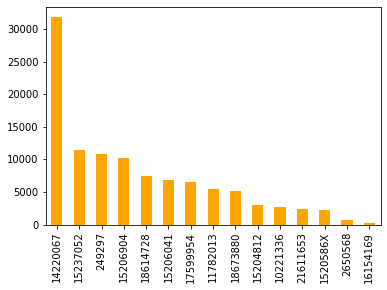

In [21]:
df_cd['ISSN'].value_counts().plot(kind='bar', color = 'orange');

As it can be seen from the barchart upper, the dataset is imbalanced in terms of issn quantity with the majority of articles from journal with issn = 14220067. It means that further our algorythm will mostly choose similar articles from this journal

In [22]:
df_drop = df_cd.drop(df_cd[df_cd['ISSN'] == 14220067].sample(n = 20000).index)

In [23]:
df_drop.reset_index(drop=True, inplace=True)

In [24]:
df_drop

,Unnamed: 0_x,DOI,Title,Year,num_citiations,ISSN,Abstract_x,Unnamed: 0_y,Abstract_y
0,710,10.1039/d0np00072h,Employing chemical synthesis to study the stru...,2020,8,2650568,<p>This review recounts the chemical journey f...,0,Covering: 2015 to 2020The field of natural pro...
1,718,10.1039/d0np90029j,Hot off the Press,2020,0,2650568,<p>A personal selection of 32 recent papers is...,1,A personal selection of 32 recent papers is pr...
2,719,10.1039/c9np00028c,Phenolic cross-links: building and de-construc...,2020,58,2650568,<p>Phenolic cross-links and inter-unit linkage...,2,Covering: Up to 2019Phenolic cross-links and p...
3,722,10.1039/d0np00009d,Dehydration reactions in polyfunctional natura...,2020,10,2650568,"<p>Here, we review methods for chemical dehydr...",3,"Covering: up to 2020In this review, we present..."
4,723,10.1039/d0np00016g,"Diving into the world of marine 2,11-cyclized ...",2020,15,2650568,"<p>This review summarises new marine 2,11-cycl...",4,"Covering: 2010 to 2020The class of 2,11-cycliz..."
...,...,...,...,...,...,...,...,...,...
87154,501655,10.1021/op1002775,Asymmetric Synthesis of (<i>S</i>)-3-Amino-4-m...,2011,39,1520586X,NaN,2196,A new synthesis of (S)-3-amino-4-methoxy-butan...
87155,501656,10.1021/op100267p,A Robust Three-Step Telescoped Synthesis of El...,2011,7,1520586X,NaN,2197,A robust three-step telescoped process for the...
87156,501657,10.1021/op100280c,Development of a Safe and Practical <i>N-</i>O...,2011,2,1520586X,NaN,2198,A safe and practical procedure for the N-oxida...
87157,501658,10.1021/op100247m,Development of an Optimized Process for the Pr...,2011,7,1520586X,NaN,2199,A thoroughly optimized and robust process for ...


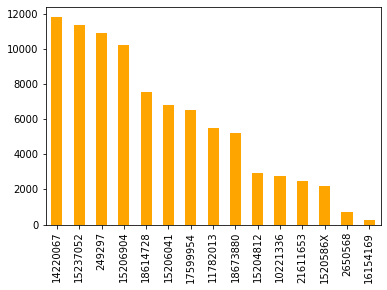

In [25]:
df_drop['ISSN'].value_counts().plot(kind='bar', color = 'orange');

In [26]:
df_cd = df_drop

In [27]:
df_cd = df_cd.drop_duplicates()
df_cd.reset_index(drop=True, inplace=True)
df_cd

,Unnamed: 0_x,DOI,Title,Year,num_citiations,ISSN,Abstract_x,Unnamed: 0_y,Abstract_y
0,710,10.1039/d0np00072h,Employing chemical synthesis to study the stru...,2020,8,2650568,<p>This review recounts the chemical journey f...,0,Covering: 2015 to 2020The field of natural pro...
1,718,10.1039/d0np90029j,Hot off the Press,2020,0,2650568,<p>A personal selection of 32 recent papers is...,1,A personal selection of 32 recent papers is pr...
2,719,10.1039/c9np00028c,Phenolic cross-links: building and de-construc...,2020,58,2650568,<p>Phenolic cross-links and inter-unit linkage...,2,Covering: Up to 2019Phenolic cross-links and p...
3,722,10.1039/d0np00009d,Dehydration reactions in polyfunctional natura...,2020,10,2650568,"<p>Here, we review methods for chemical dehydr...",3,"Covering: up to 2020In this review, we present..."
4,723,10.1039/d0np00016g,"Diving into the world of marine 2,11-cyclized ...",2020,15,2650568,"<p>This review summarises new marine 2,11-cycl...",4,"Covering: 2010 to 2020The class of 2,11-cycliz..."
...,...,...,...,...,...,...,...,...,...
86246,501655,10.1021/op1002775,Asymmetric Synthesis of (<i>S</i>)-3-Amino-4-m...,2011,39,1520586X,NaN,2196,A new synthesis of (S)-3-amino-4-methoxy-butan...
86247,501656,10.1021/op100267p,A Robust Three-Step Telescoped Synthesis of El...,2011,7,1520586X,NaN,2197,A robust three-step telescoped process for the...
86248,501657,10.1021/op100280c,Development of a Safe and Practical <i>N-</i>O...,2011,2,1520586X,NaN,2198,A safe and practical procedure for the N-oxida...
86249,501658,10.1021/op100247m,Development of an Optimized Process for the Pr...,2011,7,1520586X,NaN,2199,A thoroughly optimized and robust process for ...


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.metrics import accuracy_score, f1_score
from sklearn.utils import shuffle

In [29]:
df_cd['num_citiations'].mean()

25.51214478672711

In [30]:
df_cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86251 entries, 0 to 86250
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0_x    86251 non-null  int64 
 1   DOI             86251 non-null  object
 2   Title           86251 non-null  object
 3   Year            86251 non-null  int64 
 4   num_citiations  86251 non-null  int64 
 5   ISSN            86251 non-null  object
 6   Abstract_x      12215 non-null  object
 7   Unnamed: 0_y    86251 non-null  int64 
 8   Abstract_y      86251 non-null  object
dtypes: int64(4), object(5)
memory usage: 5.9+ MB


#**SciBert training**

# Training dataset preparation

In [31]:
cellsFrameBERT = pd.get_dummies(df_cd.ISSN)

In [32]:
cellsFrameBERT

,249297,2650568,10221336,11782013,14220067,15204812,15206041,15206904,15237052,16154169,17599954,18614728,18673880,21611653,1520586X
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86246,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
86247,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
86248,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
86249,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [33]:
df_cd

,Unnamed: 0_x,DOI,Title,Year,num_citiations,ISSN,Abstract_x,Unnamed: 0_y,Abstract_y
0,710,10.1039/d0np00072h,Employing chemical synthesis to study the stru...,2020,8,2650568,<p>This review recounts the chemical journey f...,0,Covering: 2015 to 2020The field of natural pro...
1,718,10.1039/d0np90029j,Hot off the Press,2020,0,2650568,<p>A personal selection of 32 recent papers is...,1,A personal selection of 32 recent papers is pr...
2,719,10.1039/c9np00028c,Phenolic cross-links: building and de-construc...,2020,58,2650568,<p>Phenolic cross-links and inter-unit linkage...,2,Covering: Up to 2019Phenolic cross-links and p...
3,722,10.1039/d0np00009d,Dehydration reactions in polyfunctional natura...,2020,10,2650568,"<p>Here, we review methods for chemical dehydr...",3,"Covering: up to 2020In this review, we present..."
4,723,10.1039/d0np00016g,"Diving into the world of marine 2,11-cyclized ...",2020,15,2650568,"<p>This review summarises new marine 2,11-cycl...",4,"Covering: 2010 to 2020The class of 2,11-cycliz..."
...,...,...,...,...,...,...,...,...,...
86246,501655,10.1021/op1002775,Asymmetric Synthesis of (<i>S</i>)-3-Amino-4-m...,2011,39,1520586X,NaN,2196,A new synthesis of (S)-3-amino-4-methoxy-butan...
86247,501656,10.1021/op100267p,A Robust Three-Step Telescoped Synthesis of El...,2011,7,1520586X,NaN,2197,A robust three-step telescoped process for the...
86248,501657,10.1021/op100280c,Development of a Safe and Practical <i>N-</i>O...,2011,2,1520586X,NaN,2198,A safe and practical procedure for the N-oxida...
86249,501658,10.1021/op100247m,Development of an Optimized Process for the Pr...,2011,7,1520586X,NaN,2199,A thoroughly optimized and robust process for ...


In [34]:
train_data_BERT = df_cd
train_data_BERT = train_data_BERT.join(cellsFrameBERT)
train_data_BERT = train_data_BERT.drop(columns=['ISSN'])
train_data_BERT = train_data_BERT.drop(columns=['Abstract_x'])
train_data_BERT = train_data_BERT.drop(columns=['Unnamed: 0_x'])
train_data_BERT = train_data_BERT.drop(columns=['Unnamed: 0_y'])
train_data_BERT

,DOI,Title,Year,num_citiations,Abstract_y,249297,2650568,10221336,11782013,14220067,15204812,15206041,15206904,15237052,16154169,17599954,18614728,18673880,21611653,1520586X
0,10.1039/d0np00072h,Employing chemical synthesis to study the stru...,2020,8,Covering: 2015 to 2020The field of natural pro...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,10.1039/d0np90029j,Hot off the Press,2020,0,A personal selection of 32 recent papers is pr...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10.1039/c9np00028c,Phenolic cross-links: building and de-construc...,2020,58,Covering: Up to 2019Phenolic cross-links and p...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10.1039/d0np00009d,Dehydration reactions in polyfunctional natura...,2020,10,"Covering: up to 2020In this review, we present...",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,10.1039/d0np00016g,"Diving into the world of marine 2,11-cyclized ...",2020,15,"Covering: 2010 to 2020The class of 2,11-cycliz...",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86246,10.1021/op1002775,Asymmetric Synthesis of (<i>S</i>)-3-Amino-4-m...,2011,39,A new synthesis of (S)-3-amino-4-methoxy-butan...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
86247,10.1021/op100267p,A Robust Three-Step Telescoped Synthesis of El...,2011,7,A robust three-step telescoped process for the...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
86248,10.1021/op100280c,Development of a Safe and Practical <i>N-</i>O...,2011,2,A safe and practical procedure for the N-oxida...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
86249,10.1021/op100247m,Development of an Optimized Process for the Pr...,2011,7,A thoroughly optimized and robust process for ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


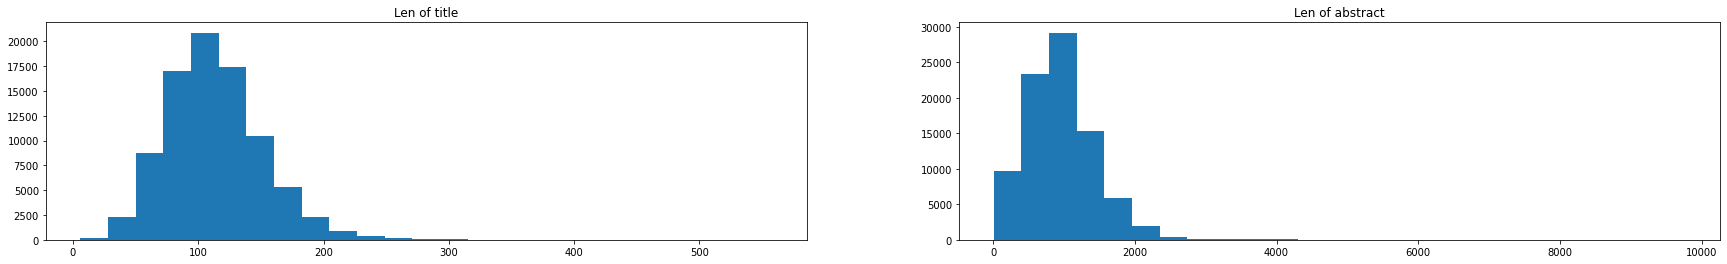

In [35]:
plt.figure(figsize=(30, 4))

plt.subplot(1, 2, 1)
plt.hist(train_data_BERT['Title'].str.len(), bins=25)
plt.title('Len of title')

plt.subplot(1, 2, 2)
plt.hist(train_data_BERT['Abstract_y'].str.len(), bins=25)
plt.title('Len of abstract')

plt.show()

**Token Lengths:**

In average, the title has length around 100 tokens.

The abstract, on the other hand, has on average less than 2500 tokens

In [36]:
def tokenize(x: tf.Tensor, max_length=250):#250 - the length of tokens for title
    x = x.numpy().decode('utf-8')
    tokens = tokenizer.encode_plus(x, 
                                   padding='max_length', 
                                   return_tensors="tf", 
                                   max_length=max_length, 
                                   truncation=True,  
                                   pad_to_max_length=True, 
                                   return_token_type_ids=False)
    return tokens['input_ids'], tokens['attention_mask']

In [37]:
def convert_to_tf_tensor(title, abstract, label):
    title = tf.squeeze(tf.py_function(tokenize, [title], Tout=[tf.int32, tf.int32]))
    abstract = tf.squeeze(tf.py_function(tokenize, [abstract, 500], Tout=[tf.int32, tf.int32]))
    
    return title[0], title[1], abstract[0], abstract[1], tf.expand_dims(label, axis=-1)

In [38]:
def map_to_dict(title_inputs_ids, title_attention_mask, abstract_input_ids, abstract_attention_mask, labels):
    inputs = {
        'title_input_ids': title_inputs_ids,
        'title_attention_mask': title_attention_mask,
        'abstract_input_ids': abstract_input_ids, 
        'abstract_attention_mask': abstract_attention_mask
    }
    return inputs, labels

In [39]:
total_rows = len(train_data_BERT)

train_data_BERT = shuffle(train_data_BERT) #data shuffling
train_size = int(total_rows * 0.8)
valid_size = int(total_rows * 0.1)

df_train = train_data_BERT[:train_size]
df_valid = train_data_BERT[train_size : train_size+valid_size]
df_test = train_data_BERT[train_size+valid_size:]

In [40]:
df_train 

,DOI,Title,Year,num_citiations,Abstract_y,249297,2650568,10221336,11782013,14220067,15204812,15206041,15206904,15237052,16154169,17599954,18614728,18673880,21611653,1520586X
66497,10.1021/om101078p,Asymmetric Synthesis of P-Stereogenic Homo- an...,2011,10,Subsequent to their coordination onto chiral c...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
21362,10.1021/ol4003338,"Silver-Promoted, Palladium-Catalyzed Direct Ar...",2013,74,"The Pd-catalyzed, Ag(I)-mediated intramolecula...",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
58280,10.2147/ijn.s61463,Theranostic nanoparticles based on bioreducibl...,2014,5,Theranostic nanoparticles based on superparama...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
12479,10.1021/acsmacrolett.5b00460,Organic Electron Donor–Acceptor Photoredox Cat...,2015,66,"In this study, we designed and synthesized nov...",0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
52933,10.1021/acs.bioconjchem.6b00007,Building a Molecular Trap for a Serine Proteas...,2016,4,"In drug development, molecular intervention st...",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67301,10.1021/acs.joc.0c00399,Synthesis of Conformationally Constrained Dipe...,2020,1,A general and efficient method for the synthes...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
61044,10.1021/acs.organomet.8b00361,Three-Component [1 + 1 + 1] Cyclopropanation w...,2018,7,"We report a one-step, Ru(II)-catalyzed cyclopr...",0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
73940,10.1021/acs.joc.5b02618,PPh<sub>3</sub>O as an Activating Reagent for ...,2016,17,An efficient one-pot method for the syntheses ...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
34314,10.3390/ijms20225806,Overexpression of Maize ZmC1 and ZmR Transcrip...,2019,7,Maize ZmC1 and ZmR transcription factors belon...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [41]:
train_data_BERT

,DOI,Title,Year,num_citiations,Abstract_y,249297,2650568,10221336,11782013,14220067,15204812,15206041,15206904,15237052,16154169,17599954,18614728,18673880,21611653,1520586X
66497,10.1021/om101078p,Asymmetric Synthesis of P-Stereogenic Homo- an...,2011,10,Subsequent to their coordination onto chiral c...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
21362,10.1021/ol4003338,"Silver-Promoted, Palladium-Catalyzed Direct Ar...",2013,74,"The Pd-catalyzed, Ag(I)-mediated intramolecula...",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
58280,10.2147/ijn.s61463,Theranostic nanoparticles based on bioreducibl...,2014,5,Theranostic nanoparticles based on superparama...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
12479,10.1021/acsmacrolett.5b00460,Organic Electron Donor–Acceptor Photoredox Cat...,2015,66,"In this study, we designed and synthesized nov...",0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
52933,10.1021/acs.bioconjchem.6b00007,Building a Molecular Trap for a Serine Proteas...,2016,4,"In drug development, molecular intervention st...",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10080,10.1021/ma2015084,Counterion Condensation in Nafion,2011,45,Nafion(117) membranes in contact with acidic s...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12846,10.1021/mz5001477,Metallo-Folded Single-Chain Nanoparticles with...,2014,115,Mimicking the substrate specificity and cataly...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
31111,10.3390/ijms21218060,Stem Cell-Based Therapies for Parkinson Disease,2020,14,Parkinson disease (PD) is a neurological movem...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
16826,10.1021/acs.orglett.9b01108,Revisiting Furodiindolines: One-Pot Synthesis ...,2019,12,Furodiindolines have emerged as versatile inte...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [42]:
train_label = df_train.drop(['DOI', 'Title', 'Year',  'num_citiations',  'Abstract_y'], axis=1)
train_data = tf.data.Dataset.from_tensor_slices((df_train['Title'], df_train['Abstract_y'], train_label))

valid_label = df_valid.drop(['DOI', 'Title', 'Year',  'num_citiations',  'Abstract_y'], axis=1)
valid_data = tf.data.Dataset.from_tensor_slices((df_valid['Title'], df_valid['Abstract_y'], valid_label))

test_label = df_test.drop(['DOI', 'Title', 'Year',  'num_citiations',  'Abstract_y'], axis=1)
test_data = tf.data.Dataset.from_tensor_slices((df_test['Title'], df_test['Abstract_y'], test_label))

In [43]:
train_label

,249297,2650568,10221336,11782013,14220067,15204812,15206041,15206904,15237052,16154169,17599954,18614728,18673880,21611653,1520586X
66497,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
21362,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
58280,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
12479,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
52933,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67301,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
61044,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
73940,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
34314,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [44]:
test_label

,249297,2650568,10221336,11782013,14220067,15204812,15206041,15206904,15237052,16154169,17599954,18614728,18673880,21611653,1520586X
59148,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
50700,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
41006,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
32108,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
15021,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10080,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12846,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
31111,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
16826,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [45]:
train_ds = (train_data
            .shuffle(1000)
            .map(convert_to_tf_tensor)
            .map(map_to_dict)
            .batch(32)
            .prefetch(tf.data.AUTOTUNE))

valid_ds = valid_data.map(convert_to_tf_tensor).map(map_to_dict).batch(32)
test_ds = test_data.map(convert_to_tf_tensor).map(map_to_dict).batch(32)

#Modelling BERT

In [46]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 4.9 MB/s 
     |████████████████████████████████| 163 kB 84.8 MB/s 
     |████████████████████████████████| 7.6 MB 47.1 MB/s 


In [47]:
from transformers import AutoTokenizer, TFAutoModel

In [48]:
bert = TFAutoModel.from_pretrained("giacomomiolo/scibert_reupload")
bert.trainable = False

Downloading:   0%|          | 0.00/471 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertModel.

All the layers of TFBertModel were initialized from the model checkpoint at giacomomiolo/scibert_reupload.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [49]:
# Inputs
title_input_ids = tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name="title_input_ids")
title_attention_mask = tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name="title_attention_mask")
abstract_input_ids = tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name="abstract_input_ids")
abstract_attention_mask = tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name="abstract_attention_mask")

# Title Embedding
title_output = bert(input_ids=title_input_ids, attention_mask=title_attention_mask)
title_emb = tf.reduce_mean(title_output['last_hidden_state'], axis=1)
title_emb = tf.keras.layers.Dense(512, activation='relu')(title_emb)

# Abstract Embedding
abstract_output = bert(input_ids=abstract_input_ids, attention_mask=abstract_attention_mask)
abstract_emb = tf.reduce_mean(abstract_output['last_hidden_state'], axis=1)
abstract_emb = tf.keras.layers.Dense(512, activation='relu')(abstract_emb)

x = tf.concat((title_emb, abstract_emb), axis=-1)

# MLP
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(15)(x) #output lauer with number of classes 

# for multi-binary prediction. Each label is independent from other label.
output = tf.expand_dims(x, axis=-1) 

# Create Model
inputs = {
    "title_input_ids": title_input_ids, 
    "title_attention_mask": title_attention_mask,
    "abstract_input_ids": abstract_input_ids, 
    "abstract_attention_mask": abstract_attention_mask
}
model = tf.keras.Model(inputs=inputs, outputs=output)

In [50]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 title_input_ids (InputLayer)   [(None, None)]       0           []                               
                                                                                                  
 title_attention_mask (InputLay  [(None, None)]      0           []                               
 er)                                                                                              
                                                                                                  
 abstract_input_ids (InputLayer  [(None, None)]      0           []                               
 )                                                                                                
                                                                                              

In [51]:
tokenizer = AutoTokenizer.from_pretrained("allenai/scibert_scivocab_uncased")

Downloading:   0%|          | 0.00/385 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/228k [00:00<?, ?B/s]

#Model training

In [52]:
model.compile(
    optimizer='adam', 
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics='accuracy')

In [53]:
train_ds

<PrefetchDataset element_spec=({'title_input_ids': TensorSpec(shape=<unknown>, dtype=tf.int32, name=None), 'title_attention_mask': TensorSpec(shape=<unknown>, dtype=tf.int32, name=None), 'abstract_input_ids': TensorSpec(shape=<unknown>, dtype=tf.int32, name=None), 'abstract_attention_mask': TensorSpec(shape=<unknown>, dtype=tf.int32, name=None)}, TensorSpec(shape=(None, 15, 1), dtype=tf.uint8, name=None))>

In [54]:
model_history = model.fit(train_ds, 
                          epochs=3, 
                          callbacks=tf.keras.callbacks.EarlyStopping(patience=1), 
                          validation_data=valid_ds)

Epoch 1/3
2157/2157 [==============================] - 4823s 2s/step - loss: 0.0910 - accuracy: 0.9623 - val_loss: 0.0775 - val_accuracy: 0.9671
Epoch 2/3
2157/2157 [==============================] - 4802s 2s/step - loss: 0.0741 - accuracy: 0.9681 - val_loss: 0.0748 - val_accuracy: 0.9691
Epoch 3/3
2157/2157 [==============================] - 4801s 2s/step - loss: 0.0698 - accuracy: 0.9698 - val_loss: 0.0733 - val_accuracy: 0.9686


In [55]:
preds = model.predict(test_ds)
preds = tf.squeeze(preds)
preds = tf.where(tf.math.sigmoid(preds) >= 0.5, 1.0, 0.0)

270/270 [==============================] - 484s 2s/step


In [56]:
test_label.head(10)

,249297,2650568,10221336,11782013,14220067,15204812,15206041,15206904,15237052,16154169,17599954,18614728,18673880,21611653,1520586X
59148,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
50700,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
41006,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
32108,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
15021,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
78341,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
48607,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
56091,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
10809,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
46637,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [57]:
print (preds[:10])

tf.Tensor(
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]], shape=(10, 15), dtype=float32)


According to the predictions and the labels above, it can be seen that model shows impressively accurate results.


##Now let's check the results specifically for each quartile

In [58]:
column_names = list(test_label.columns)
print (column_names)

[249297, 2650568, 10221336, 11782013, 14220067, 15204812, 15206041, 15206904, 15237052, 16154169, 17599954, 18614728, 18673880, 21611653, '1520586X']


In [59]:
acc_scores = []
f1_scores = []
for i, col_name in enumerate(column_names):
    acc = accuracy_score(test_label[col_name], preds[:,i]).item()
    f1 = f1_score(test_label[col_name], preds[:,i], average='macro')
    
    acc_scores.append(acc)
    f1_scores.append(f1)
    
    print (col_name)
    print ('acc: {:.3f}'.format(acc))
    print ('f1 : {:.3f}'.format(f1))
    print ()

249297
acc: 0.967
f1 : 0.911

2650568
acc: 0.997
f1 : 0.902

10221336
acc: 0.974
f1 : 0.768

11782013
acc: 0.986
f1 : 0.943

14220067
acc: 0.982
f1 : 0.962

15204812
acc: 0.981
f1 : 0.810

15206041
acc: 0.983
f1 : 0.939

15206904
acc: 0.906
f1 : 0.721

15237052
acc: 0.912
f1 : 0.789

16154169
acc: 0.997
f1 : 0.566

17599954
acc: 0.962
f1 : 0.838

18614728
acc: 0.934
f1 : 0.802

18673880
acc: 0.994
f1 : 0.971

21611653
acc: 0.971
f1 : 0.497

1520586X
acc: 0.994
f1 : 0.927



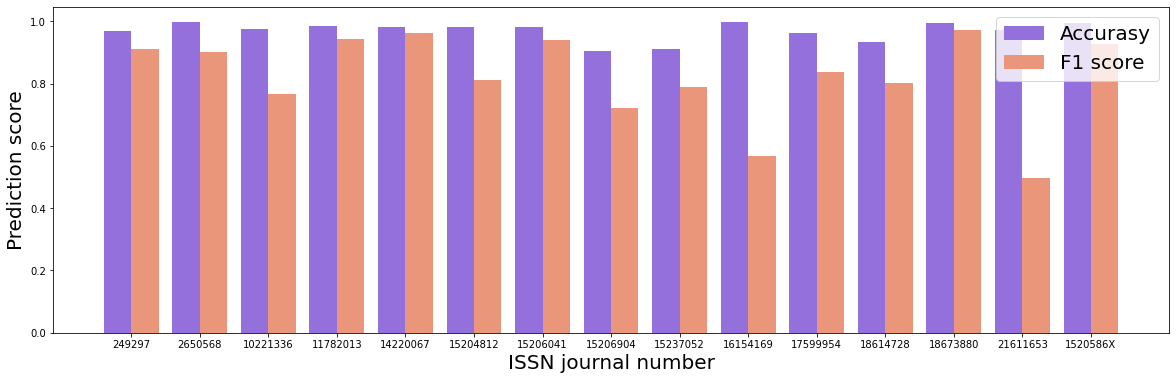

In [60]:
X_axis = np.arange(len(column_names))

plt.figure(figsize=(20, 6))
plt.bar(X_axis-0.2, acc_scores, width=0.4, color = 'mediumpurple', label='Accurasy')
plt.bar(X_axis+0.2, f1_scores, width=0.4, color = 'darksalmon', label='F1 score')

plt.xticks(X_axis, column_names)
plt.ylabel('Prediction score', size = 20)
plt.xlabel('ISSN journal number', size = 20)
plt.legend(prop={'size': 20});
plt.show()

#Part 2: probability prediction

Predicting the distribution accross ISSN with the last output layer as softmax


Let's try to change output dense layer and add softmax probability activation=tf.keras.activations.softmax


In [61]:
# Inputs
title_input_ids = tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name="title_input_ids")
title_attention_mask = tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name="title_attention_mask")
abstract_input_ids = tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name="abstract_input_ids")
abstract_attention_mask = tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name="abstract_attention_mask")

# Title Embedding
title_output = bert(input_ids=title_input_ids, attention_mask=title_attention_mask)
title_emb = tf.reduce_mean(title_output['last_hidden_state'], axis=1)
title_emb = tf.keras.layers.Dense(512, activation='relu')(title_emb)

# Abstract Embedding
abstract_output = bert(input_ids=abstract_input_ids, attention_mask=abstract_attention_mask)
abstract_emb = tf.reduce_mean(abstract_output['last_hidden_state'], axis=1)
abstract_emb = tf.keras.layers.Dense(512, activation='relu')(abstract_emb)

x = tf.concat((title_emb, abstract_emb), axis=-1)

# MLP
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(15, activation=tf.keras.activations.softmax)(x)

# for multi-binary prediction. Each label is independent from other label.
output = tf.expand_dims(x, axis=-1) 

# Create Model
inputs = {
    "title_input_ids": title_input_ids, 
    "title_attention_mask": title_attention_mask,
    "abstract_input_ids": abstract_input_ids, 
    "abstract_attention_mask": abstract_attention_mask
}
model = tf.keras.Model(inputs=inputs, outputs=output)

In [ ]:
model.compile(
    optimizer='adam', 
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics='accuracy')

In [ ]:
model_history = model.fit(train_ds, 
                          epochs=3, 
                          callbacks=tf.keras.callbacks.EarlyStopping(patience=1), 
                          validation_data=valid_ds)

In [ ]:
preds = model.predict(test_ds)
preds

In [ ]:
preds = tf.squeeze(preds)
preds

In [ ]:
tf.round(preds)


<tf.Tensor: shape=(1949, 4), dtype=float32, numpy=
array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]], dtype=float32)>